# Several ways to measure carbon emissions when training and diving deeper into other impacts

---

Master 2 Informatique - Université de Bordeaux
Image et Son  - Image Processing and Computer Vision

---
Authors : Lucia Bouza,  Aurélie Bugeau, Anne Vialard
Acknowledgments : Anne-Laure Ligozat

---

## Several ways to measure carbon emissions when training 


### Introduction

In previous practice, you have studied the use of the **online tool Green Algorithms** (https://www.green-algorithms.org). In the first part of this practical session, you will compare this tool with two others for measuring the environmental impacts of deep learning code. You will calculate the carbon footprint produced by the training of a digit classification network using:

#### Wattmeter: 
You will track real energy consumption from wattmeter measurements. Turn off the computer in cremi, plug it onto the wattmeter and restart it. Measures will be obtained by reading onto the wattmeter screen. Press the Mode button once to read values in Watt. 

Observe the values when not running any program and when running your jupyter-notebook.

#### Software tool: Code Carbon
Code Carbon is a Python library to measure carbon emissions. The notebook will explain how to install and use the library, as well as visualize the results. 



##### Wattmeter

<span style="color:DarkRed"> Q1. According to you, what are the advantages and disadvantages of using a wattmeter?  </span>


<span style="color:DarkRed"> Q2. Turn off every softwares you might be running on the computer (except from the jupyter-notebook). Observe the current consumption indicated by the wattmeter. </span>

<span style="color:DarkRed"> Q3. Run the command. Observe the approximate power consumption while running the program. What is the energy consumption? What is the dynamic consumption and static consumption</span>


In [2]:
 !time python TrainingClassification.py

Epoch [1/5], Train Loss: 1.9707, Train Acc: 0.5262, Val Loss: 1.5007, Val Acc: 0.7058
Epoch [2/5], Train Loss: 1.1570, Train Acc: 0.7614, Val Loss: 0.8910, Val Acc: 0.8121
Epoch [3/5], Train Loss: 0.7678, Train Acc: 0.8341, Val Loss: 0.6497, Val Acc: 0.8587
Epoch [4/5], Train Loss: 0.5966, Train Acc: 0.8650, Val Loss: 0.5284, Val Acc: 0.8812
Epoch [5/5], Train Loss: 0.5037, Train Acc: 0.8810, Val Loss: 0.4579, Val Acc: 0.8919

real	0m36,559s
user	0m36,174s
sys	0m1,911s



### Practice with CodeCarbon

[CodeCarbon](https://codecarbon.io) is a software package for Python. It estimates the amount of gas emissions produced by the execution of the code. CodeCarbon takes into account energy consumption and location to calculate the carbon footprint.

#### Installation

You will work on cremi computer
> Remark: On your personal computer, you can install the library by using pip or conda (for example `pip install codecarbon`).


#### Using CodeCarbon

There are several ways of using the library, but here we use the recommended way for notebooks, using the `start` and `stop` functions of the tracker. Other options can be found in the [documentation](https://mlco2.github.io/codecarbon/usage.html).
 The package by default logs data into a CSV file named `emissions.csv` in the current directory.

<span style="color:DarkRed"> Q4. What lines have been added int the code `TrainingClassification_codecarbon.py`? Run it and observe the results. 
    
<span style="color:DarkRed"> Q5. The list of supported CPU on codecarbon is available here: https://github.com/mlco2/codecarbon/blob/master/codecarbon/data/hardware/cpu_power.csv . Is your CPU listed? If not, what is the the TDP of your CPU? Note that if the CPU is not listed then codecarbon will estimate the power consumption of the CPUs as 50% of their thermal design power (TDP) using a default TDP average of 85W. Compare you rTDP with this 85W.</span>



Information about the infrastructure of the used platform can be seen on the standard output. The output also indicates the energy consumed by the components and the resulting emissions.

> **Remark 1:** CPUs tracking uses RAPL files or Power Gadget (only for INTEL CPUs with root access). The consumption reported by RAPL files or Power Gadget represents the consumption of the whole machine, and not only the process. If CodeCarbon cannot find the software to track the CPUs, then the tool uses the model of CPU to search in a list the corresponding TDP. If the model is unknown, it uses a TDP of 85W. This assumption can lead to reporting values of carbon emissions that are not real.

> **Remark 2:** GPUs tracking uses `pynvml` library (only for NVIDIA GPUs). CodeCarbon does not measure consumption of *non-NVIDIA GPUs*. The consumption reported by pynvml represents the consumption of the whole machine, and not only the process.

> **Remark 3:** Energy consumption by memory is 0.375W/GB of memory used. If tracking mode is *process*, the memory used by the process is measured via `psutil`.


<span style="color:DarkRed">Q6.  Compare the energy consumption with the one from Green-Algorithms and wattmeter. </span>



<span style="color:DarkRed"> Q7. What advantages and disadvantages do you see in using each tool?</span>

## B - Precision vs. consumption

Let us consider again the following _scenario 1_.

|  Specifications |   | 
|---|---|
|  Execution time | 190h |   
| Number of CPUs  |  4 |   
| Type of CPUs  | Xeon E5-2683 v4  |  
| Number of GPUs  | 4  | 
| Type of GPUs  |  Tesla V100 |  
| Avalaible memory  |  32 Go |  
| Location of the server | Orsay,France  |  

<span style="color:DarkRed">Q8. In this scenario, what quantity of CO2 emission would have been saved if the training add been stopped after three days? (use Green Algorithms to answer the questions)</span>



Let us now consider the following figure from <a name="cite_ref-1"></a>[[1]](#cite_note-1). This figure displays CO2 emitted in kg (in France) by different end-to-end automatic speech recognition models with respect to the word error rate (WER) on the dev sets of LibriSpeech and CommonVoice. The curves exhibit an exponential trend as most of the training time is devoted to slightly reduce the WER. The black and red dots indicate the WER obtained with 50% and 100% of the emitted CO2. On LibriSpeech, 50% of the carbon emissions have been dedicated to reach SOTA results with an improvement of 0.37%.


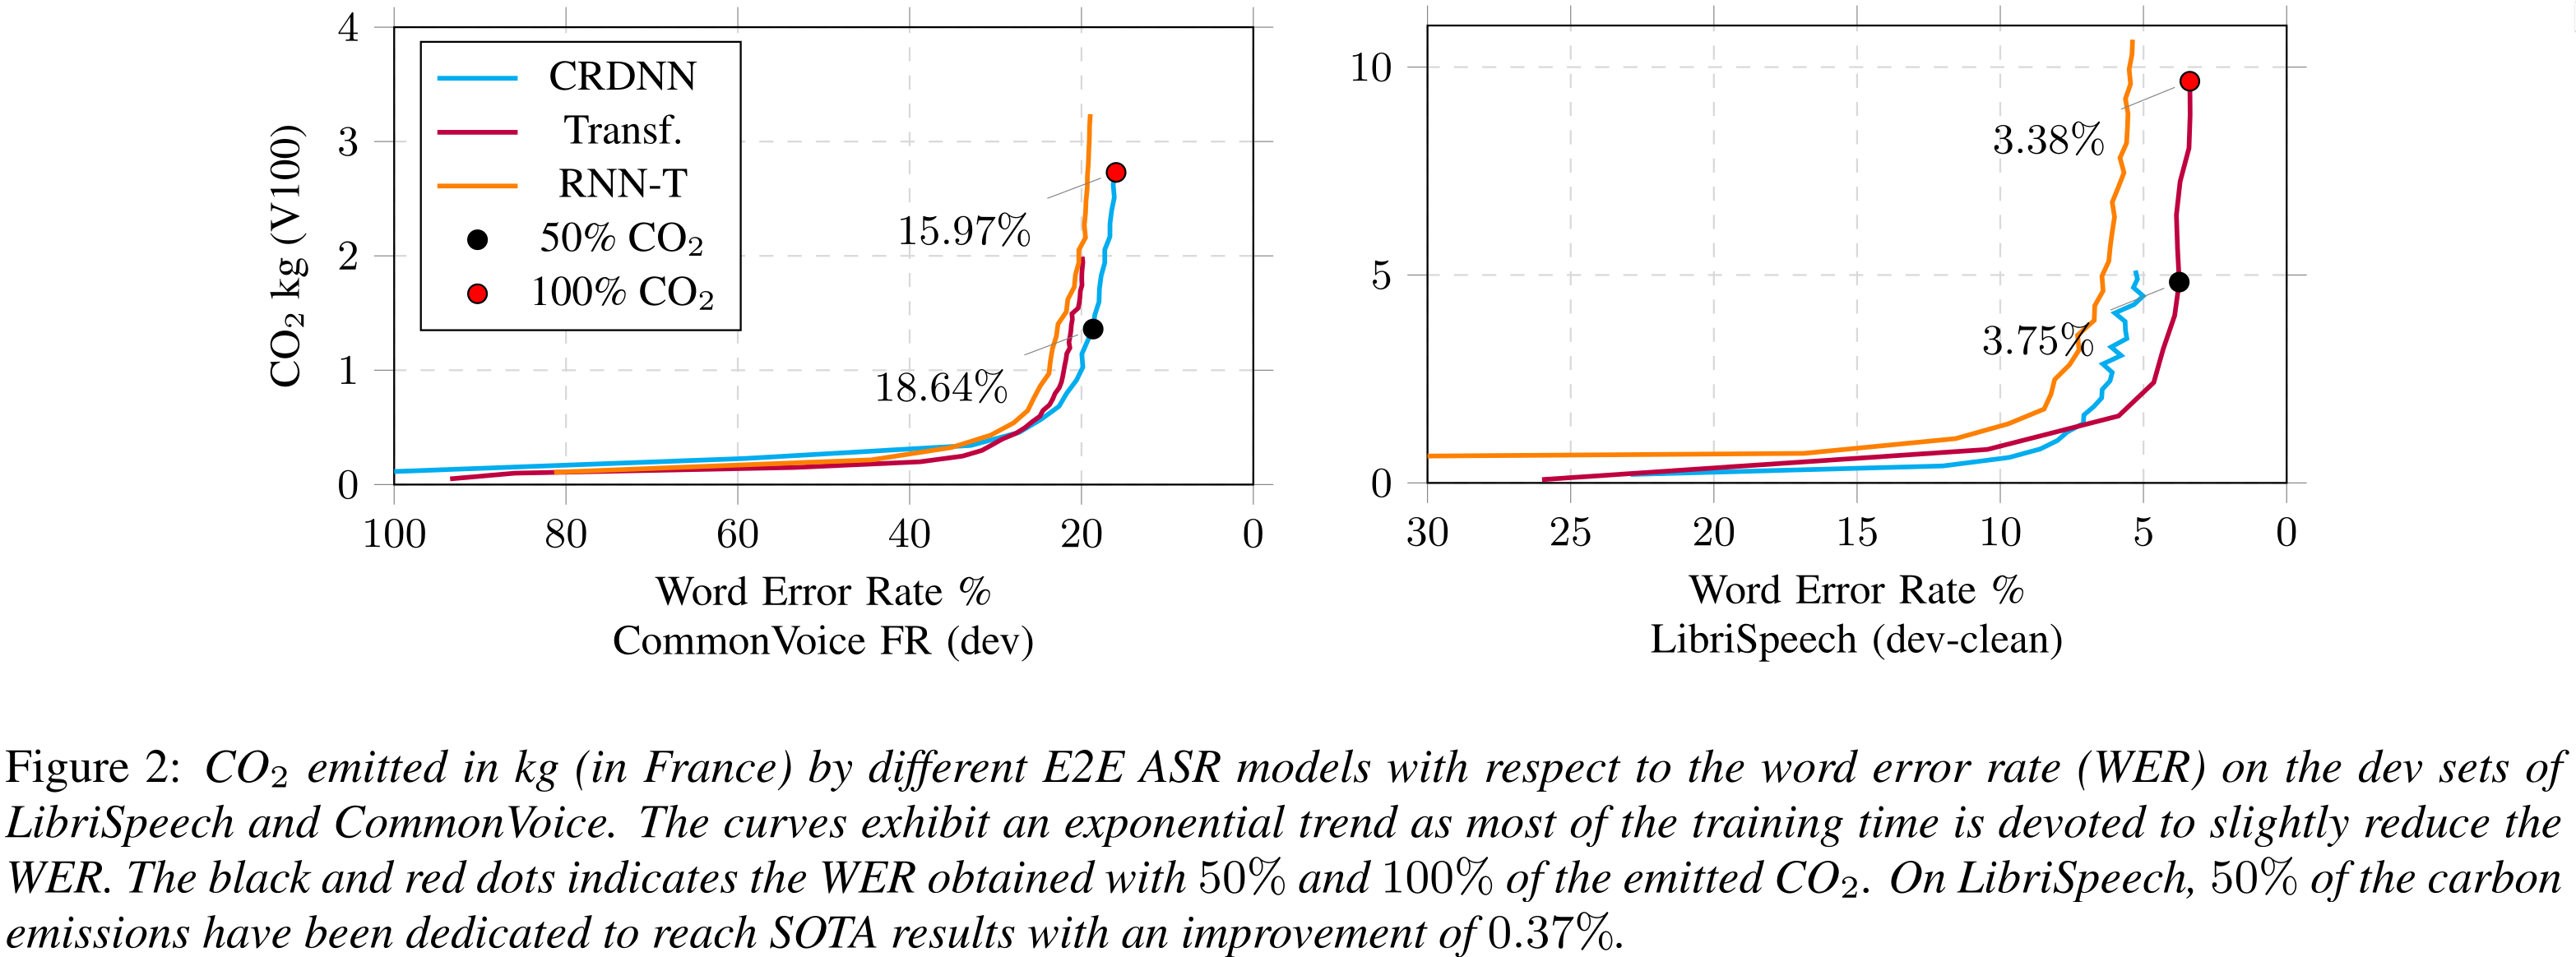

In [3]:
from IPython.display import Image
Image(filename='Parcollet.png') 

<span style="color:DarkRed">Q9. Which is the best speech recognition model according to WER? When do you think it is reasonable to stop the training of such a model? </span>


We will now observe and measure more deeply the consumption while training digit classification. 

In `TrainingClassification_codecarbon_callback.py`, we add a print function for codecarbon. During training, the progress is displayed on standard output. Once finished, it can be useful to visualize how the model evolved during training.

We also define a callback to track energy consumption during training. A callback is created so that at the end of an epoch the energy consumption is verified, and the training is interrupt if the threshold of 0.001kwh was exceeded. Save the intermediate values of energy consumed by the training. You can use the callback method on_epoch_end. 


<span style="color:DarkRed"> Q10. Observe the file `TrainingClassification_codecarbon_callback.py` to see the differences. 
Add code to plot curves displaying evolution of accuracy and energy consumption across epochs. According to you: When does it make sense to end the training, considering the accuracy and energy consumption? </span>

<span style="color:DarkRed">Q11. Try different threshold values, for example: 0.0001 and 0.01 kwh </span>

<span style="color:DarkRed">Q12. Experiment now with offline tracking to specify information on running infrastructure. Try also with other countries (Sweden and Poland for instance). Do you see any differences on when the training stops?</span>

## C. Other Impacts


 Let us now consider the second scenario taken from  <a name="cite_ref-2"></a>[[2]](#cite_note-2). In this paper, an estimation of the carbon footprint of the language model Bloom is proposed. 
 
 <span style="color:DarkRed">Q13. Use Green Algorithm to evaluate carbon emissions and compare with the results from the paper (section 4.2).   </span>

|  Specifications |   | 
|---|---|
|  Execution time | 118 days (2 832 hours), 5 hours, 41 mins  |   
| Type of GPUs  | Nvidia A100  |  
| Number of GPUs  | 416  | 
| TDP of CPU |  400 |  
| Avalaible memory  |  33 280 GB |  
| Location of the server | Orsay, France  |   
| PUE | 1.2  |  
| Carbon intensity of the energy grid | 57 gCO2eq/kWh |

<span style="color:DarkRed">Q14. In this paper observe table 2. What part of power consumption is computed by Green Algorithm? </span>
    
<span style="color:DarkRed">Q15. Read section 4.4 of this paper. Are there some information that you found surprising regarding the deployment of the model?</span>
    
<span style="color:DarkRed">Q16. According to your knowledge, do all these tools take into account all environmental impacts? </span>



## References


<a name="cite_note-1"></a>[1] [^](#cite_ref-1)  Titouan Parcollet, Mirco Ravanelli. The Energy and Carbon Footprint of Training End-to-End Speech Recognizers. 2021


<a name="cite_note-2"></a>[2] [^](#cite_ref-2)  A.S. Luccioni, S. Viguier, A.-L. Ligozat. Estimating the Carbon Footprint of BLOOM, a 176B Parameter, arXiv:2211.02001, 2022